**Minimisation des distances**

In [1]:
import pandas as pd
import numpy as np

import dash
from dash import html, dcc, Input, Output
import joblib
from sklearn.cluster import KMeans
import networkx as nx
from sklearn.manifold import MDS
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors


Code destiné à tester différentes méthodes de représentation des topics en fonction de leur matrice de distance.

In [2]:
full_data = joblib.load("bertopic_results_data.joblib")         #Récupération et mise en forme des données
topic_info = full_data["topic_info"]

df=pd.read_csv("Proximity_Matrix.csv", sep=";")          
df.head(5)

,Unnamed: 0,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,topic_0,1.000000,0.763636,0.690909,0.709091,0.709091,0.600000,0.690909,0.709091,0.490909,...,0.363636,0.363636,0.363636,0.272727,0.254545,0.200000,0.218182,0.109091,0.072727,0.072727
1,topic_1,0.763636,1.000000,0.672727,0.636364,0.781818,0.654545,0.709091,0.672727,0.472727,...,0.345455,0.363636,0.345455,0.272727,0.236364,0.181818,0.218182,0.109091,0.054545,0.072727
2,topic_2,0.690909,0.672727,1.000000,0.680000,0.686275,0.620000,0.760000,0.711538,0.520000,...,0.400000,0.360000,0.380000,0.280000,0.280000,0.240000,0.240000,0.120000,0.080000,0.080000
3,topic_3,0.709091,0.636364,0.680000,1.000000,0.686275,0.583333,0.693878,0.692308,0.541667,...,0.416667,0.395833,0.375000,0.270833,0.312500,0.229167,0.229167,0.104167,0.083333,0.083333
4,topic_4,0.709091,0.781818,0.686275,0.686275,1.000000,0.647059,0.705882,0.711538,0.509804,...,0.372549,0.333333,0.333333,0.294118,0.254902,0.176471,0.254902,0.098039,0.058824,0.078431


In [3]:
df_to_numpy = df.to_numpy()
dist_matrice = 1-df_to_numpy[:,1:]

c:\miniconda\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


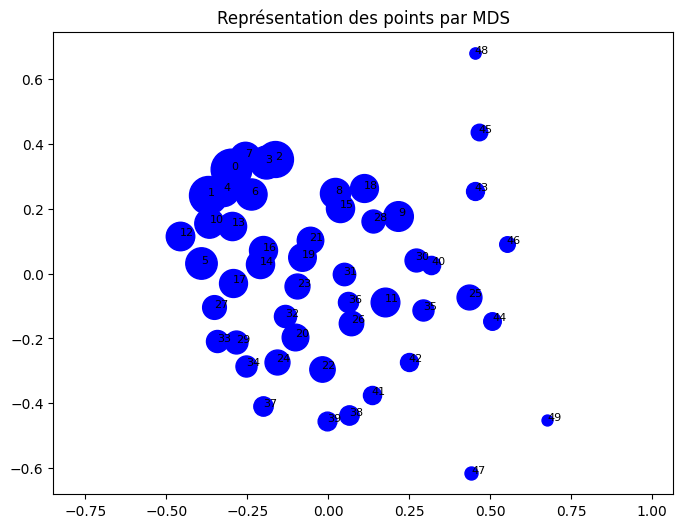

In [4]:
#Méthode de réduction du stress par MDS 
# minimisation des différences entre les distances théoriques et représentées. 

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coordonees = mds.fit_transform(dist_matrice)

#Affichage des tailles (par représentativité des topics)

plt.figure(figsize=(8, 6))
for i in range(len(coordonees)):
    plt.scatter(coordonees[i, 0], coordonees[i, 1], c='blue', s=50+2*topic_info["Count"].explode()[i])
    plt.text(coordonees[i, 0], coordonees[i, 1], str(i), fontsize=8)
plt.title('Représentation des points par MDS')
plt.grid(False)
plt.axis('equal')
plt.show()

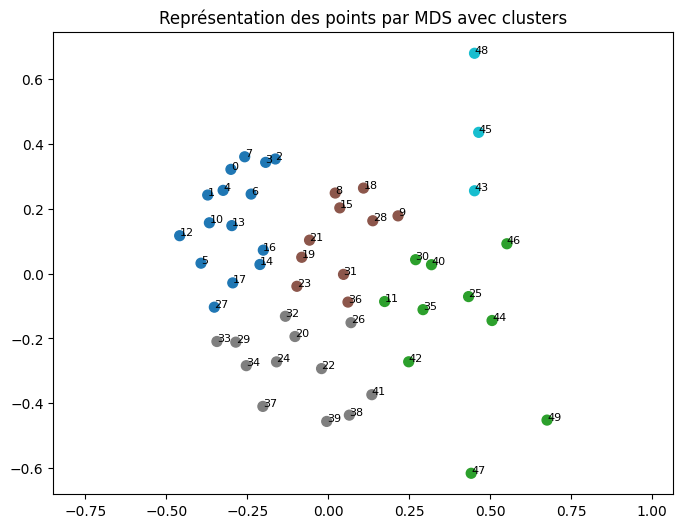

In [5]:
#Affichage des clusters

nombre_clusters = 5  
kmeans = KMeans(n_clusters=nombre_clusters, random_state=43)
labels = kmeans.fit_predict(coordonees)

plt.figure(figsize=(8, 6))
plt.scatter(coordonees[:, 0], coordonees[:, 1], c=labels, cmap='tab10', s=50)
for i in range(len(coordonees)):
    plt.text(coordonees[i, 0], coordonees[i, 1], str(i), fontsize=8)
plt.title('Représentation des points par MDS avec clusters')
plt.grid(False)
plt.axis('equal')
plt.show()

C:\Users\Ogle1905\AppData\Local\Temp\ipykernel_7124\3712050643.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')
C:\Users\Ogle1905\AppData\Local\Temp\ipykernel_7124\3712050643.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(coordonees[i, 0], coordonees[i, 1], c=cmap(norm(labels[i])), cmap='tab10', s=50+2*topic_info["Count"].explode()[i])
C:\Users\Ogle1905\AppData\Local\Temp\ipykernel_7124\3712050643.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be

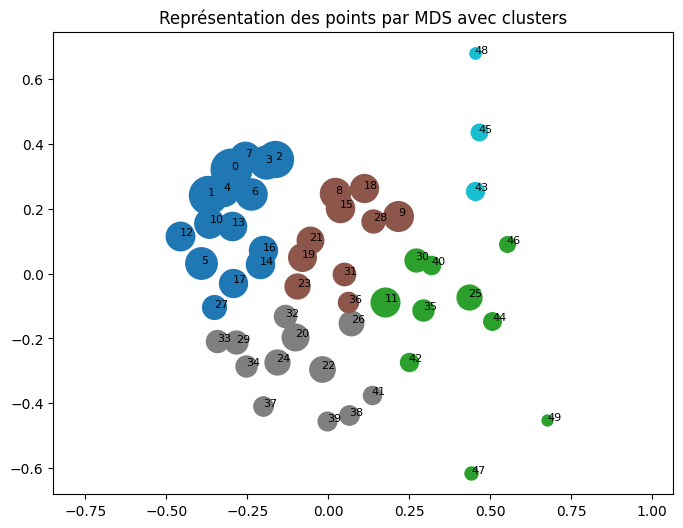

In [6]:
#Mise en commun des deux

cmap = cm.get_cmap('tab10')  
norm = mcolors.Normalize(vmin=0, vmax=4)  

plt.figure(figsize=(8, 6))
for i in range(len(coordonees)):
    plt.scatter(coordonees[i, 0], coordonees[i, 1], c=cmap(norm(labels[i])), cmap='tab10', s=50+2*topic_info["Count"].explode()[i])
    plt.text(coordonees[i, 0], coordonees[i, 1], str(i), fontsize=8)
plt.title('Représentation des points par MDS avec clusters')
plt.axis('equal')
plt.show()

C:\Users\Ogle1905\AppData\Local\Temp\ipykernel_7124\1323017327.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(coordonees_bis[i, 0], coordonees_bis[i, 1], c=cmap(norm(labels_bis[i])), cmap='tab10', s=50+2*topic_info["Count"].explode()[i])
C:\Users\Ogle1905\AppData\Local\Temp\ipykernel_7124\1323017327.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(coordonees_bis[i, 0], coordonees_bis[i, 1], c=cmap(norm(labels_bis[i])), cmap='tab10', s=50+2*topic_info["Count"].explode()[i])


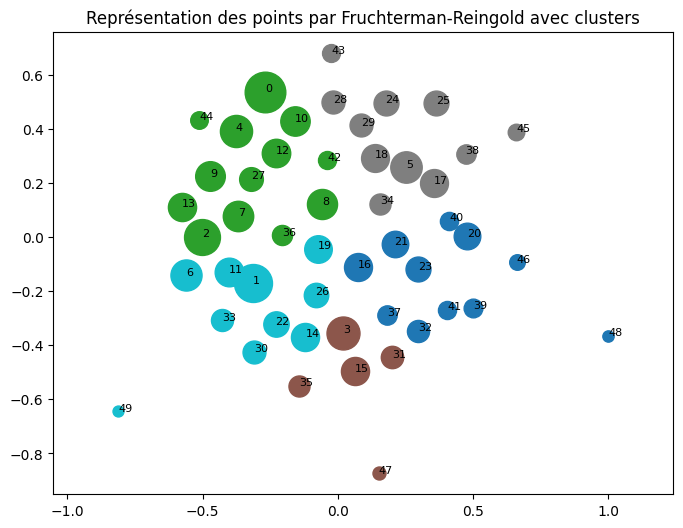

In [7]:
#Représentation des points suivant Fruchterman-Reingold
# Cette méthode considère la structure comme un système physique dont on cherche
#à minimiser l'énergie en considérant les proximités entre les points comme des liens répulsifs ou attractifs

Graph_temp = nx.Graph()                        
for i in range(50):                   
    for j in range(i + 1, 50):        
        Graph_temp.add_edge(i, j, dist=dist_matrice[i, j])  
        
poids = {(u, v): 1 - d['dist'] for u, v, d in Graph_temp.edges(data=True)} 
nx.set_edge_attributes(Graph_temp, poids, name='poids')

pos = nx.spring_layout(Graph_temp, weight='poids', seed=43)
coordonees_bis = np.array([pos[i] for i in range(50)])

#On affiche de même les clusters avec différentes couleurs et les tailles des topics

kmeans_bis = KMeans(n_clusters=nombre_clusters, random_state=44)
labels_bis = kmeans_bis.fit_predict(coordonees_bis)

plt.figure(figsize=(8, 6))
for i in range(len(coordonees_bis)):
    plt.scatter(coordonees_bis[i, 0], coordonees_bis[i, 1], c=cmap(norm(labels_bis[i])), cmap='tab10', s=50+2*topic_info["Count"].explode()[i])
    plt.text(coordonees_bis[i, 0], coordonees_bis[i, 1], str(i), fontsize=8)
plt.title('Représentation des points par Fruchterman-Reingold avec clusters')
plt.axis('equal')
plt.show()



C:\Users\Ogle1905\AppData\Local\Temp\ipykernel_7124\201820541.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(coordonees_ter[i, 0], coordonees_ter[i, 1], c=cmap(norm(labels_ter[i])), cmap='tab10', s=50+2*topic_info["Count"].explode()[i])
C:\Users\Ogle1905\AppData\Local\Temp\ipykernel_7124\201820541.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(coordonees_ter[i, 0], coordonees_ter[i, 1], c=cmap(norm(labels_ter[i])), cmap='tab10', s=50+2*topic_info["Count"].explode()[i])


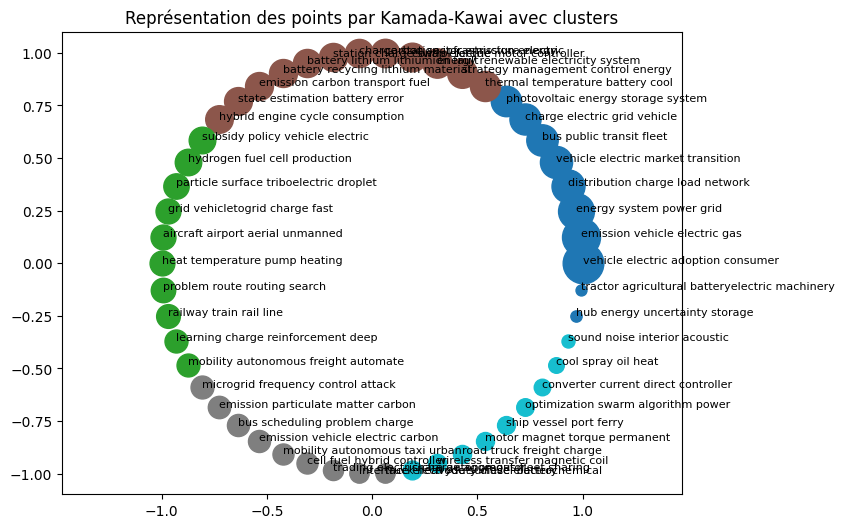

In [8]:
#Représentation des points suivant Kamada-Kawai
# Il s'agit d'un autre algorithme dans la même idée que Fruchterman-Reingold. Avec les valeurs actuelles,
#cette méthode semble peut adaptée

Graph_temp2 = nx.Graph()
for i in range(50):
    for j in range(i + 1, 50):
        Graph_temp2.add_edge(i, j, dist=dist_matrice[i, j])
        
pos2 = nx.kamada_kawai_layout(Graph_temp2, dist=dict(((i, j), dist_matrice[i, j]) for i in range(50) for j in range(i + 1, 50)))
coordonees_ter = np.array([pos2[i] for i in range(50)])

kmeans_ter = KMeans(n_clusters=nombre_clusters, random_state=45)
labels_ter = kmeans_ter.fit_predict(coordonees_ter)

plt.figure(figsize=(8, 6))
for i in range(len(coordonees_ter)):
    start = topic_info["Name"].explode()[i].index('_')
    nom_topic=topic_info["Name"].explode()[i][start+1:].replace('_',' ')
    plt.scatter(coordonees_ter[i, 0], coordonees_ter[i, 1], c=cmap(norm(labels_ter[i])), cmap='tab10', s=50+2*topic_info["Count"].explode()[i])
    plt.text(coordonees_ter[i, 0], coordonees_ter[i, 1], nom_topic, fontsize=8)
plt.title('Représentation des points par Kamada-Kawai avec clusters')
plt.axis('equal')
plt.show()

